In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [58]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

data = iris['data']
y = iris['target'].values

In [59]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
y[:5]

array([0, 0, 0, 0, 0])

In [61]:
# Здесь должен быть ваш код
# 0 = setosa, 1 = versicolor, 2 = virginica
# Перекодируем зависимую переменную
# versicolor (y=1) -> метка 1, остальные виды -> метка 0

y_binary = (y == 1).astype(int)

print("Значения исходного y:", y[:150])
print("Значения бинарного y:", y_binary[:150])
print(f"Класс 0 (не versicolor): {np.sum(y_binary == 0)} цветков")
print(f"Класс 1 (versicolor): {np.sum(y_binary == 1)} цветков")

Значения исходного y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Значения бинарного y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Класс 0 (не versicolor): 100 цветков
Класс 1 (versicolor): 50 цветков


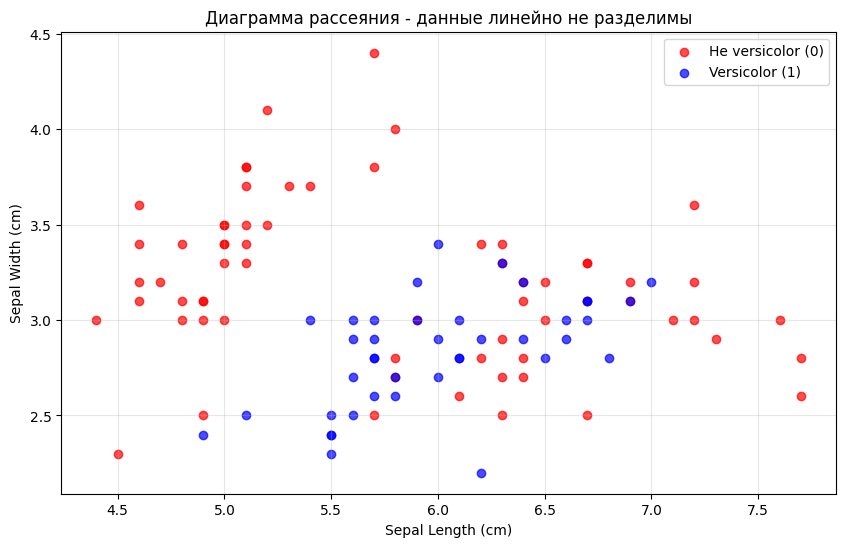

In [62]:
# Здесь должен быть ваш код
X = data[['sepal length (cm)', 'sepal width (cm)']].values

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=123)

plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
           c='red', label='Не versicolor (0)', alpha=0.7)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
           c='blue', label='Versicolor (1)', alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Диаграмма рассеяния - данные линейно не разделимы')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [63]:
# Задание 2: Работа с двумя признаками и проверка линейной разделимости

# 1. Выбираем два признака: sepal length и sepal width
X = data[['sepal length (cm)', 'sepal width (cm)']].values

print("Форма матрицы признаков X:", X.shape)
print("Первые 5 строк X:")
print(X[:5])

Форма матрицы признаков X: (150, 2)
Первые 5 строк X:
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]


In [64]:
# 2. Делим данные на обучающую и тестовую выборки
# Используем y_binary из задания 1
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=123)

print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

Обучающая выборка: 105 samples
Тестовая выборка: 45 samples


In [65]:
from sklearn.preprocessing import StandardScaler

# 3. Применяем StandardScaler для масштабирования данных
ss = StandardScaler()
ss.fit(X_train)  # считаем μ и σ только по обучающим данным

# Преобразуем данные
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

print("Средние значения признаков до масштабирования:", ss.mean_)
print("Стандартные отклонения признаков до масштабирования:", ss.scale_)
print("\nПервые 5 строк X_train_ss:")
print(X_train_ss[:5])

Средние значения признаков до масштабирования: [5.86952381 3.05047619]
Стандартные отклонения признаков до масштабирования: [0.792239   0.40710916]

Первые 5 строк X_train_ss:
[[-0.08775611 -0.6152556 ]
 [ 0.54336657  0.85855059]
 [-0.46642971 -1.84342742]
 [-0.97132786  1.84108805]
 [-1.85489961 -0.12398687]]


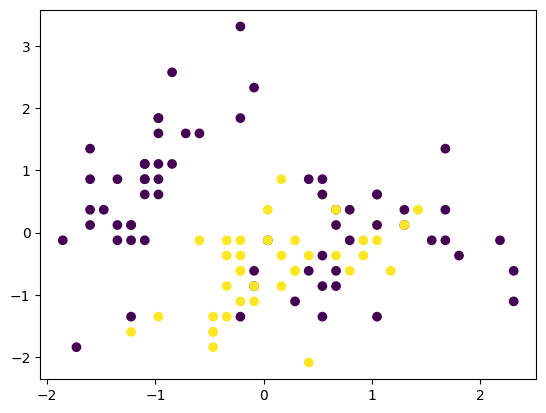

In [66]:
plt.scatter(X_train_ss[:, 0], X_train_ss[:, 1], c=y_train)
plt.show()

In [67]:
# Создаем модели
knn = KNeighborsClassifier(n_neighbors=5)
logreg = LogisticRegression()

# Обучаем классификаторы
knn.fit(X_train_ss, y_train)
logreg.fit(X_train_ss, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [68]:
# Прогноз меток класса для тестовой выборки
y_test_pred_knn = knn.predict(X_test_ss)
y_test_pred_logreg = logreg.predict(X_test_ss)

print("Первые 5 прогнозов KNN:", y_test_pred_knn[:5])
print("Первые 5 прогнозов LogReg:", y_test_pred_logreg[:5])

Первые 5 прогнозов KNN: [0 1 0 1 0]
Первые 5 прогнозов LogReg: [1 0 1 0 0]


In [69]:
# Прогноз вероятностей класса для тестовой выборки
y_test_proba_knn = knn.predict_proba(X_test_ss)
y_test_proba_logreg = logreg.predict_proba(X_test_ss)

print("Первые 5 вероятностей KNN:\n", y_test_proba_knn[:5])
print("Первые 5 вероятностей LogReg:\n", y_test_proba_logreg[:5])

Первые 5 вероятностей KNN:
 [[1.  0. ]
 [0.2 0.8]
 [0.6 0.4]
 [0.  1. ]
 [1.  0. ]]
Первые 5 вероятностей LogReg:
 [[0.29417961 0.70582039]
 [0.57205493 0.42794507]
 [0.46752787 0.53247213]
 [0.63769064 0.36230936]
 [0.90567108 0.09432892]]


In [70]:
# Оценка метрики качества
from sklearn.metrics import accuracy_score

print(f'Точность KNN: {accuracy_score(y_test, y_test_pred_knn):.3f}')
print(f'Точность LogReg: {accuracy_score(y_test, y_test_pred_logreg):.3f}')

Точность KNN: 0.756
Точность LogReg: 0.844


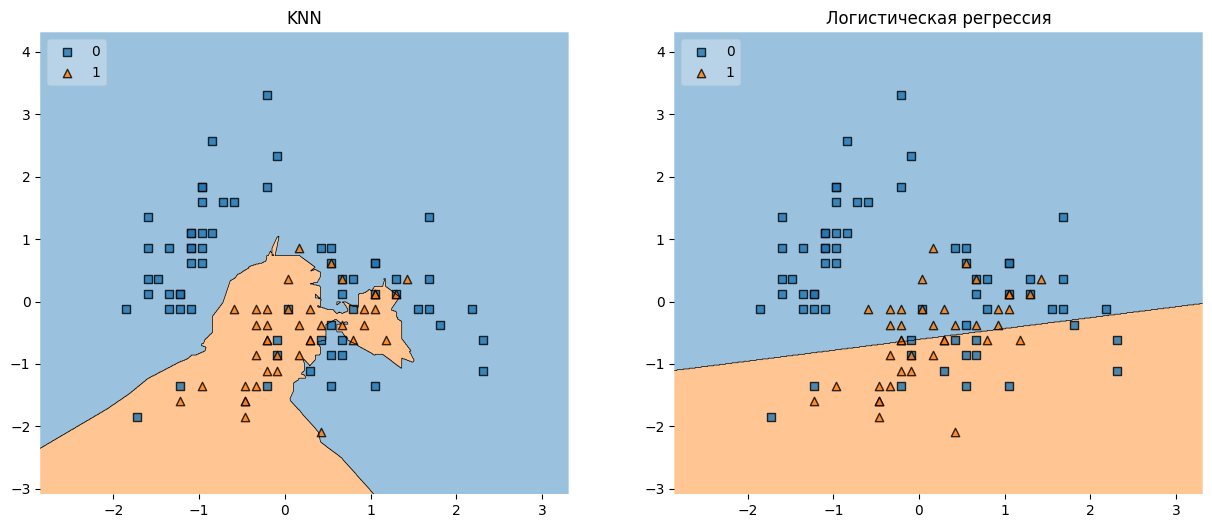

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
plot_decision_regions(X_train_ss, y_train, clf=knn, legend=2, ax=ax1)
ax1.set_title('KNN')
plot_decision_regions(X_train_ss, y_train, clf=logreg, legend=2, ax=ax2)
ax2.set_title('Логистическая регрессия')
plt.show()

In [72]:
# Задание 4: Логистическая регрессия с разной регуляризацией

logreg_1 = LogisticRegression(C=0.01)
logreg_2 = LogisticRegression(C=0.05)
logreg_3 = LogisticRegression(C=10)


C=0.01: точность = 0.778
C=0.05: точность = 0.844
C=10: точность = 0.844


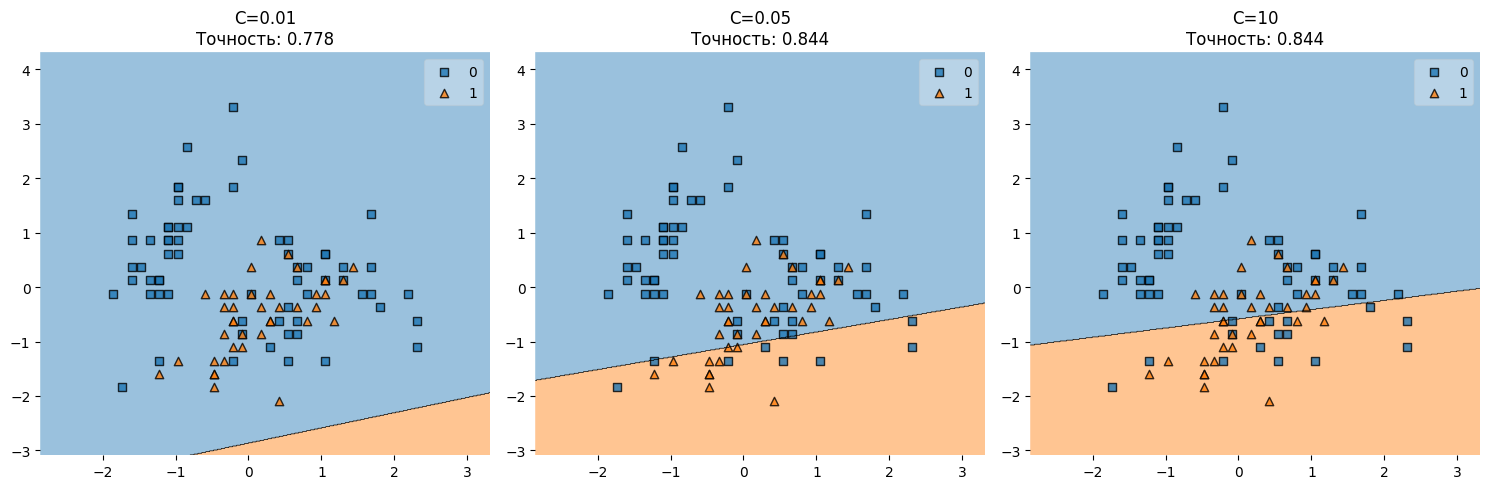

In [73]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
pipes = [logreg_1, logreg_2, logreg_3]
for i, clf in enumerate(pipes):
    clf.fit(X_train_ss, y_train)
    score = accuracy_score(y_test, clf.predict(X_test_ss))
    print(f"C={clf.C}: точность = {score:.3f}")
    plot_decision_regions(X_train_ss, y_train, clf=clf, ax=axes[i])
    axes[i].set_title(f"C={clf.C}\nТочность: {score:.3f}")

plt.tight_layout()
plt.show()

In [74]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_3 = KNeighborsClassifier(n_neighbors=50)


Точность при n_neighbors=1: 0.844
Точность при n_neighbors=5: 0.756
Точность при n_neighbors=50: 0.844


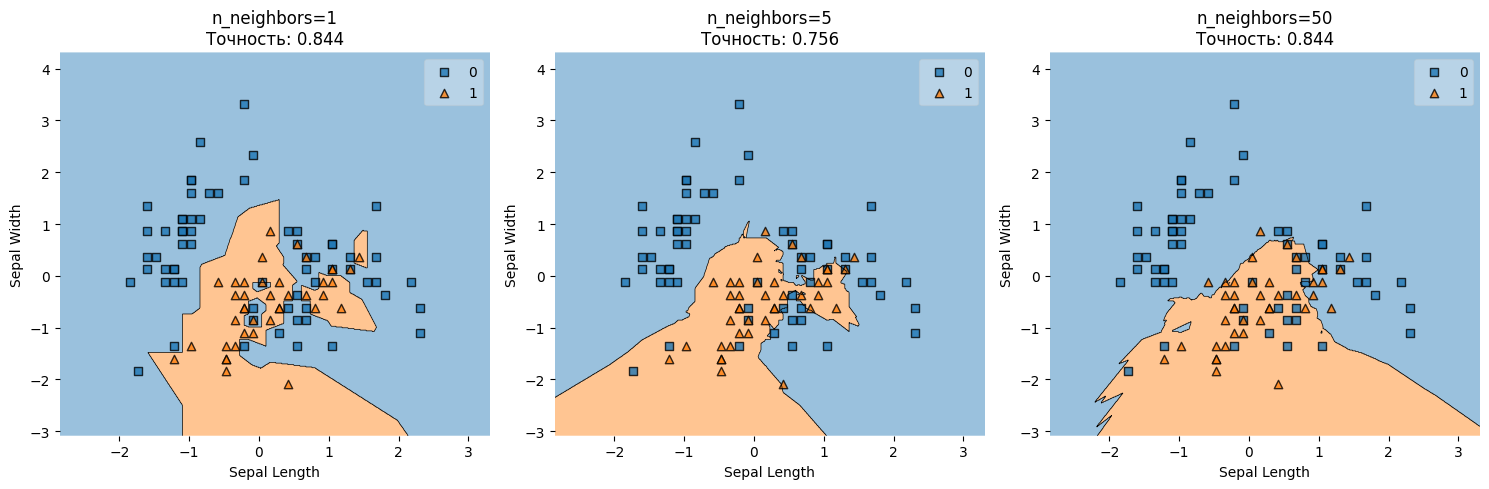

In [75]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
pipes = [knn_1, knn_2, knn_3]

for ind, clf in enumerate(pipes):
    clf.fit(X_train_ss, y_train)
    y_test_pred = clf.predict(X_test_ss)
    score = accuracy_score(y_test, y_test_pred)
    print(f"Точность при n_neighbors={clf.get_params()['n_neighbors']}: {score:.3f}")
    plot_decision_regions(X_train_ss, y_train, clf=clf, ax=axes[ind])
    axes[ind].set_title(f"n_neighbors={clf.get_params()['n_neighbors']}\nТочность: {score:.3f}")
    axes[ind].set_xlabel('Sepal Length')
    axes[ind].set_ylabel('Sepal Width')

plt.tight_layout()
plt.show()

In [76]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, shuffle=True, noise = 0.1, factor=0.1)

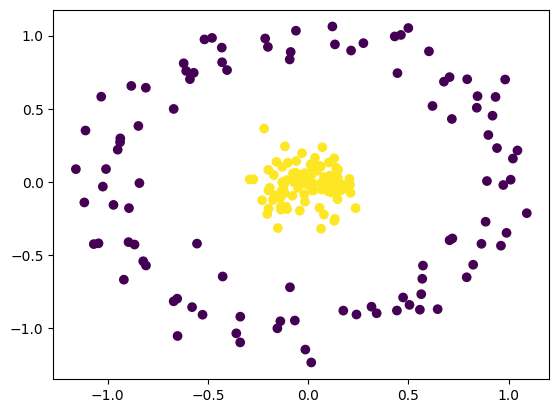

In [77]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [78]:
# делим данные на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [79]:
# обучаем модель
logreg = LogisticRegression()
logreg.fit(X_train, y_train);

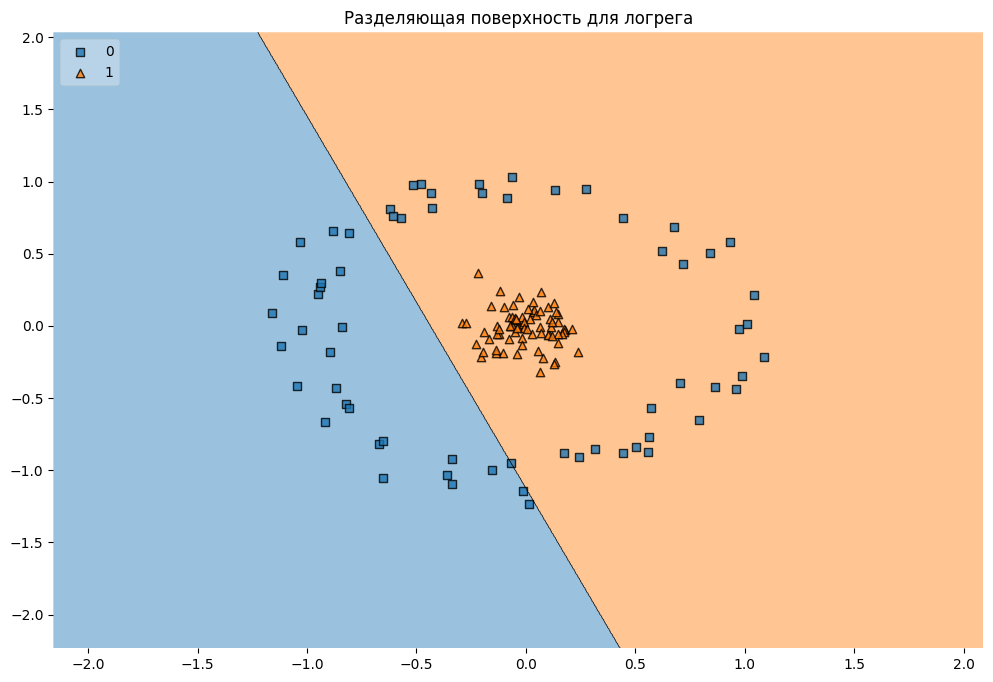

In [80]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train, y_train, clf=logreg, legend=2)
plt.title('Разделяющая поверхность для логрега');

In [81]:
X1 = X[:,0]
X2 = X[:,1]
X3 = X1**2+X2**2

X_new = np.c_[X1, X2, X3]

In [82]:
# делим данные на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=123)

In [83]:
# обучаем модель
logreg = LogisticRegression()
logreg.fit(X_train, y_train);

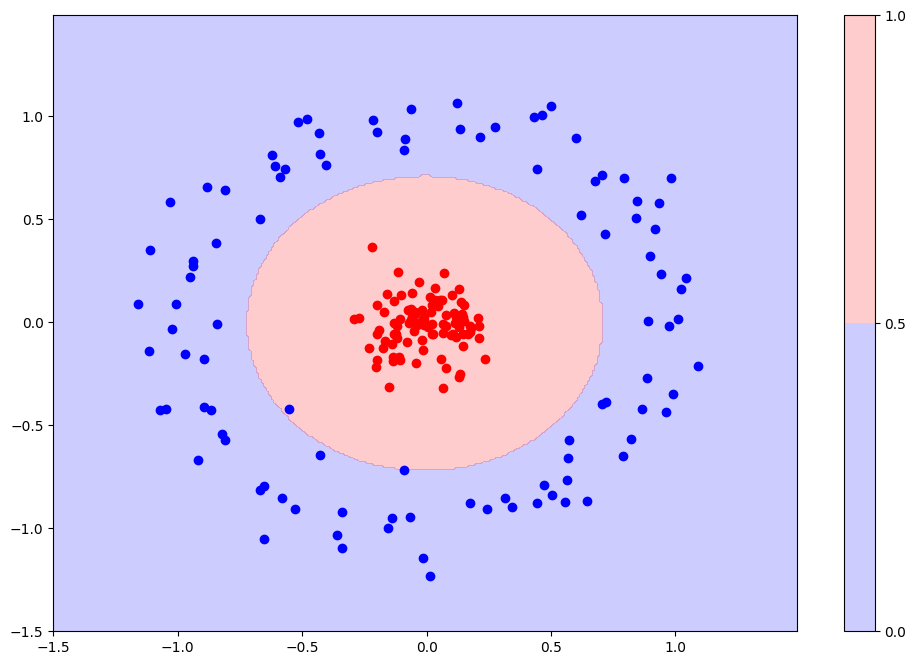

In [84]:
# Plot desicion border

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
xx0, xx1 = x0.ravel(), x1.ravel()
X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_pred = logreg.predict(X_grid)
y_pred = y_pred.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.contourf(x0, x1, y_pred, levels=1, cmap=plt.cm.seismic, alpha=0.2)
plt.colorbar()
plt.scatter(X[y==0,0], X[y==0, 1], c='b')
plt.scatter(X[y==1,0], X[y==1, 1], c='r');

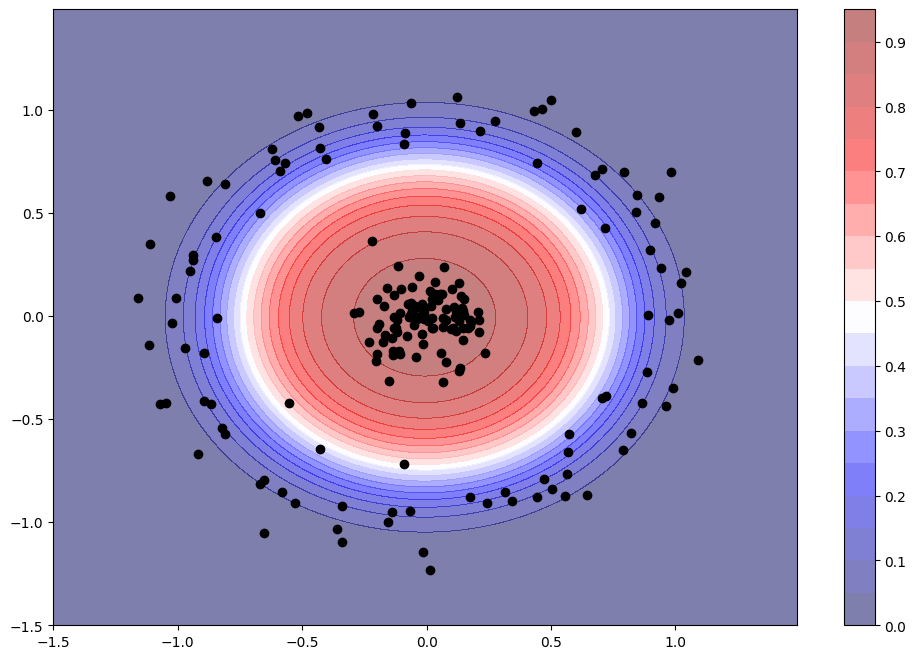

In [85]:
# Plot desicion border

x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
xx0, xx1 = x0.ravel(), x1.ravel()
X_grid = np.c_[xx0, xx1, xx0**2 + xx1**2]

y_pred = logreg.predict_proba(X_grid)[:, 1]
y_pred = y_pred.reshape(x0.shape)

plt.figure(figsize=(12,8))
plt.contourf(x0, x1, y_pred, levels=20, cmap=plt.cm.seismic, alpha=0.5)
plt.colorbar()
plt.scatter(X[y==0,0], X[y==0, 1], c='0')
plt.scatter(X[y==1,0], X[y==1, 1], c='0');

In [86]:
# Задание 6: KNN для нелинейных данных

# Обучение KNN
knn_circles = KNeighborsClassifier(n_neighbors=5)
knn_circles.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


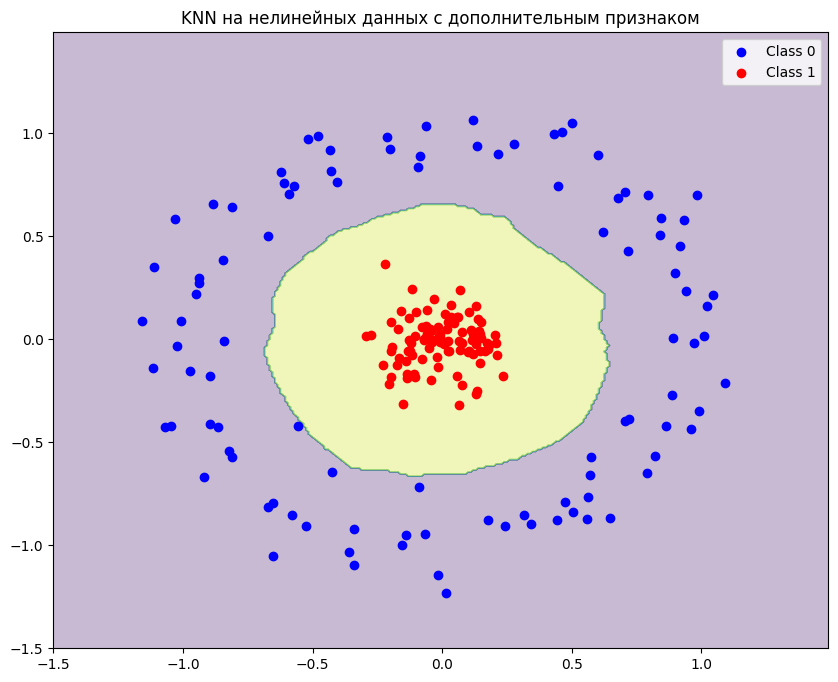

Точность KNN: 1.000


In [87]:
x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.01), np.arange(-1.5, 1.5, 0.01))
X_grid = np.c_[x0.ravel(), x1.ravel(), x0.ravel()**2 + x1.ravel()**2]

y_pred_knn = knn_circles.predict(X_grid).reshape(x0.shape)

plt.figure(figsize=(10, 8))
plt.contourf(x0, x1, y_pred_knn, alpha=0.3, cmap='viridis')
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1')
plt.title('KNN на нелинейных данных с дополнительным признаком')
plt.legend()
plt.show()

print(f"Точность KNN: {accuracy_score(y_test, knn_circles.predict(X_test)):.3f}")
